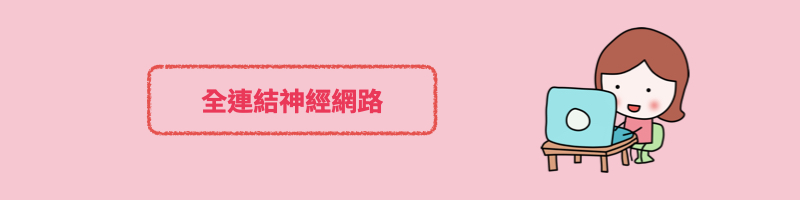

# 11.2讀入基本套件

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
from tensorflow.keras.datasets import mnist #一般手寫辨識資料

# 11.4切分訓練資料和測試資料

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 11.5欣賞一下資料

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
n = 9487 #隨機看一筆資料的長相
x_train[n] #讀出第 n 筆資料

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

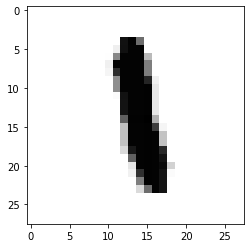

In [ ]:
plt.imshow(x_train[n], cmap='Greys')

In [ ]:
y_train[n] #第 n 筆資料的答案

1

# 11.6打造函數學習機前的資料處理

因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[n]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 12.1第一部曲：打造神經網路

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(100, input_dim=784, activation='relu'))

In [ ]:
model.add(Dense(100, activation='relu'))

In [ ]:
model.add(Dense(100, activation='relu'))

In [ ]:
model.add(Dense(10, activation='softmax'))

# 12.2組裝自己的神經網路

In [ ]:
# 組裝神經網路
model.compile(loss='mse', optimizer=SGD(learning_rate=0.087), 
              metrics=['accuracy'])

# 12.3欣賞自己的神經網路

In [ ]:
# 看一下神經網路
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


# 12.4第二部曲：訓練

In [ ]:
#訓練
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0884 - accuracy: 0.2033
Epoch 2/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0763 - accuracy: 0.4536
Epoch 3/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0455 - accuracy: 0.7484
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0247 - accuracy: 0.8575
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0191 - accuracy: 0.8820
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0168 - accuracy: 0.8943
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0154 - accuracy: 0.9026
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0144 - accuracy: 0.9078
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0136 - accuracy: 0.9119
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0130 - accuracy: 0.9160

# 12.5第三部曲：預測

In [ ]:
x_test[5].shape

(784,)

In [ ]:
inp = x_test[5].reshape(1,784)

In [ ]:
model.predict(inp)

array([[6.1106293e-06, 9.6120369e-01, 6.0543921e-03, 6.1984616e-03,
        2.0153064e-03, 3.0247821e-04, 5.2271347e-04, 1.0468112e-02,
        1.1768712e-02, 1.4600216e-03]], dtype=float32)

In [ ]:
np.argmax([9, 4, 6, 7])

0

In [ ]:
np.argmax(model.predict(inp), axis=-1)

array([1])

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

神經網路預測是： 1


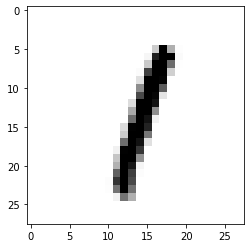

In [ ]:
n = 5
print('神經網路預測是：', y_predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

# 12.6更酷炫的互動呈現

In [ ]:
from ipywidgets import interact_manual

In [ ]:
def test(測試編號):
  plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys') #要將拉平的維度弄回 (28, 28)
  print('神經網路判斷為:', y_predict[測試編號])

In [ ]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總評量」。

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0095 - accuracy: 0.9382


In [ ]:
print('loss', score[0])
print('正確率', score[1])

loss 0.009525895118713379
正確率 0.9381999969482422


# 12.7儲存我們完整模型

如果對訓練成果滿意, 我們當然不想每次都再訓練一次! 我們可以把神經網路的架構和訓練好的參數都存起來, 以供日後使用!

在 Colab 上, 我們要先連到自己的 Google Drive。

In [ ]:
#儲存 model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


再來是 cd 到你的資料夾中, 我們通常是放到自己 Colab Notebooks 中, 自然你可以指定其他的資料夾。

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model.save('my_dnn_model')